In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\PRITAM\Downloads\Taxi Data (1).csv")

In [5]:
df.sample(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
1177,4830,Airport,122.0,Trip Completed,14-07-2016 17:23:33,14-07-2016 18:36:07
1262,1902,City,131.0,Trip Completed,12/7/2016 10:34,12/7/2016 11:46
3042,6571,City,54.0,Cancelled,15-07-2016 21:16:46,NaN
4059,5801,City,290.0,Cancelled,15-07-2016 08:40:03,NaN
902,3315,City,92.0,Trip Completed,13-07-2016 12:09:28,13-07-2016 13:19:04
5246,3247,City,NaN,No Cars Available,13-07-2016 10:13:08,NaN
908,3392,Airport,93.0,Trip Completed,13-07-2016 14:46:13,13-07-2016 15:17:16
4344,889,Airport,NaN,No Cars Available,11/7/2016 18:11,NaN
6673,6601,Airport,NaN,No Cars Available,15-07-2016 21:39:57,NaN
5141,2735,Airport,NaN,No Cars Available,13-07-2016 02:43:44,NaN


In [6]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [7]:
df['Request timestamp'] = df['Request timestamp'].map(pd.to_datetime)
df['Drop timestamp'] = df['Drop timestamp'].map(pd.to_datetime)

In [8]:
df.sample(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
1822,1484,Airport,192.0,Trip Completed,2016-12-07 05:19:00,2016-12-07 05:55:00
4642,1438,City,NaN,No Cars Available,2016-12-07 04:44:00,NaT
3173,2750,City,84.0,Cancelled,2016-07-13 03:24:24,NaT
623,6749,Airport,65.0,Trip Completed,2016-07-15 23:48:42,2016-07-16 00:36:53
1336,4858,City,139.0,Trip Completed,2016-07-14 17:33:22,2016-07-14 18:12:23
3852,5266,Airport,243.0,Cancelled,2016-07-14 21:26:44,NaT
3481,5860,City,155.0,Cancelled,2016-07-15 09:13:49,NaT
6398,6128,City,NaN,No Cars Available,2016-07-15 15:38:20,NaT
414,2089,City,43.0,Trip Completed,2016-12-07 15:49:00,2016-12-07 16:32:00
6490,6296,Airport,NaN,No Cars Available,2016-07-15 18:19:03,NaT


In [9]:
def get_dom(dt):
    return dt.day

df['dom'] = df['Request timestamp'].map(get_dom)

In [10]:
df.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dom
2266,1343,City,237.0,Trip Completed,2016-11-07 23:37:00,2016-12-07 00:32:00,7
81,4023,City,9.0,Trip Completed,2016-07-13 23:58:41,2016-07-14 00:58:39,13
3385,3206,City,135.0,Cancelled,2016-07-13 09:41:26,NaT,13
1968,2339,City,206.0,Trip Completed,2016-12-07 19:19:00,2016-12-07 20:12:00,7
1339,2001,Airport,140.0,Trip Completed,2016-12-07 13:01:00,2016-12-07 14:00:00,7


In [11]:
def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['Request timestamp'].map(get_weekday)
#extracts the weekday and puts it into a new coloumn
def get_hour(dt):
    return dt.hour

df['Request_hour'] = df['Request timestamp'].map(get_hour)#hour of cab booking

def get_hour(dt):
    return dt.hour

df['Drop_hour'] = df['Drop timestamp'].map(get_hour)
df['Trip_Duration']=df['Drop timestamp']-df['Request timestamp']#time duration of the individual trip
def get_month(dt):
    return dt.month

df['Month'] = df['Request timestamp'].map(get_month)


df.head(10)



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dom,weekday,Request_hour,Drop_hour,Trip_Duration,Month
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,0,11,13.0,01:09:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,0,17,18.0,00:50:00,11
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,2,9,9.0,00:41:00,12
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,2,21,22.0,00:55:00,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,2,8,9.0,00:52:31,7
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,2,21,22.0,00:31:31,7
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,3,6,7.0,00:57:43,7
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,4,5,6.0,00:56:00,7
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,4,17,18.0,00:53:24,7
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,7,0,6,7.0,00:39:00,11


In [12]:
df.dtypes

Request id                     int64
Pickup point                  object
Driver id                    float64
Status                        object
Request timestamp     datetime64[ns]
Drop timestamp        datetime64[ns]
dom                            int64
weekday                        int64
Request_hour                   int64
Drop_hour                    float64
Trip_Duration        timedelta64[ns]
Month                          int64
dtype: object

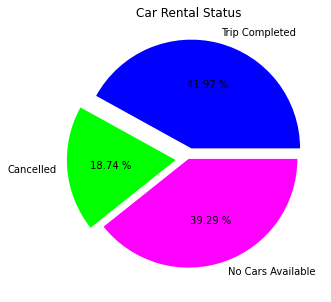

In [13]:
Completed = df.loc[df['Status'] == 'Trip Completed'].count()[0]
Cancelled = df.loc[df['Status'] == 'Cancelled'].count()[0]
No_Car=df.loc[df['Status'] == 'No Cars Available'].count()[0]
plt.figure(figsize=(8,5))

labels = ['Trip Completed', 'Cancelled','No Cars Available']
colors = [(0,0,1), (0,1,0),(1,0,1)]
explode = (.1,.12,0)
plt.pie([Completed,Cancelled,No_Car],explode=explode, labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Car Rental Status')
explode = (.4,.2,0)
plt.show()

In [14]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('dom').apply(count_rows)
by_date

dom
7     2674
13    1337
14    1353
15    1381
dtype: int64

In [15]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
13    1337
14    1353
15    1381
7     2674
dtype: int64

<Figure size 432x288 with 0 Axes>

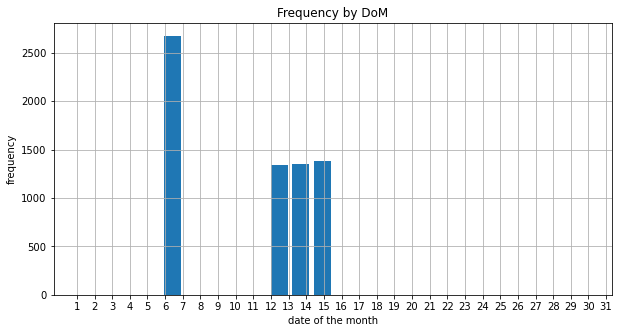

In [16]:
fig = plt.figure();
fig= plt.figure(figsize=(10,5))
plt.hist(df.dom, bins=24, rwidth=.8, range=(1, 30))
plt.xlabel('date of the month')
plt.xticks(range(1,32))
plt.ylabel('frequency')
plt.title('Frequency by DoM')
plt.grid()
plt.show()

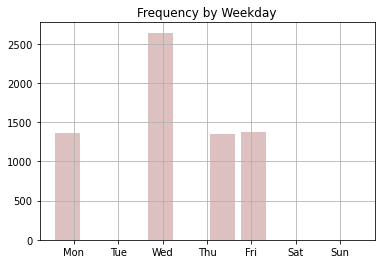

In [17]:
plt.hist(df.weekday, bins=10, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.title('Frequency by Weekday')
plt.grid()

In [18]:
Canc=df[df['Status']=='Cancelled']
Canc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dom,weekday,Request_hour,Drop_hour,Trip_Duration,Month
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,13,2,6,NaN,NaT,7
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,14,3,17,NaN,NaT,7
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,14,3,20,NaN,NaT,7
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,15,4,10,NaN,NaT,7
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,7,2,19,NaN,NaT,12
...,...,...,...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-12-07 07:20:00,NaT,7,2,7,NaN,NaT,12
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,14,3,5,NaN,NaT,7
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,14,3,5,NaN,NaT,7
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,14,3,8,NaN,NaT,7


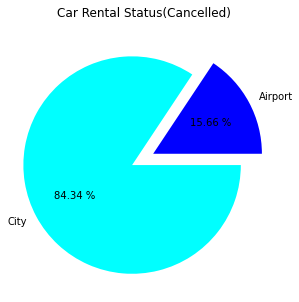

In [19]:
Airport	 = Canc.loc[Canc['Pickup point'] == 'Airport'].count()[0]
City = Canc.loc[Canc['Pickup point'] == 'City'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Airport', 'City']
colors = [(0,0,1), (0,1,1)]
explode = (.1,.12)
plt.pie([Airport,City],explode=explode, labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Car Rental Status(Cancelled)')

plt.show()

84% of cancellation happened when cab bookings were requested from the city.

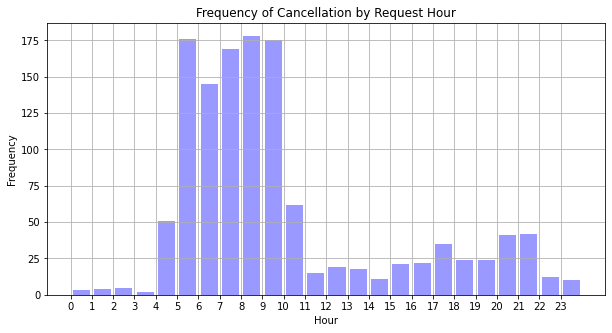

In [20]:
fig= plt.figure(figsize=(10,5))
plt.hist(Canc.Request_hour, bins=24, range =(0,24), rwidth=.8, color=(0,0,1), alpha=.4)
plt.xticks(range(0,24))
plt.title('Frequency of Cancellation by Request Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid()

By the above histogram we can obtain that maximum number of cab cancelation happened during 5 am to 9 am.And the rate of cancellation from the city is very high from which there is a posibility that cab drivers cancel the ride at that time period due to less posibility of getting return trip.

In [21]:
No_car=df[df['Status']=='No Cars Available']
No_car

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dom,weekday,Request_hour,Drop_hour,Trip_Duration,Month
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT,7,0,0,NaN,NaT,11
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT,7,0,0,NaN,NaT,11
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT,7,0,0,NaN,NaT,11
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,7,0,0,NaN,NaT,11
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,7,0,0,NaN,NaT,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,15,4,23,NaN,NaT,7
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,15,4,23,NaN,NaT,7
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,15,4,23,NaN,NaT,7
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,15,4,23,NaN,NaT,7


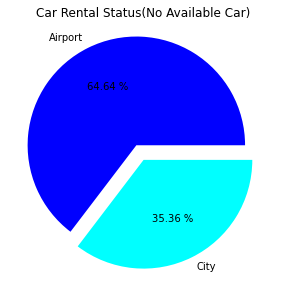

In [22]:
Airport = No_car.loc[No_car['Pickup point'] == 'Airport'].count()[0]
City = No_car.loc[No_car['Pickup point'] == 'City'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Airport', 'City']
colors = [(0,0,1), (0,1,1)]
explode = (.14,.01)
plt.pie([Airport,City],explode=explode, labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Car Rental Status(No Available Car)')

plt.show()

Majority of cancellation happened due to less availability of cab at the Airport.
the problem can be solved by increasing the number of cab service at the airport pick up point.

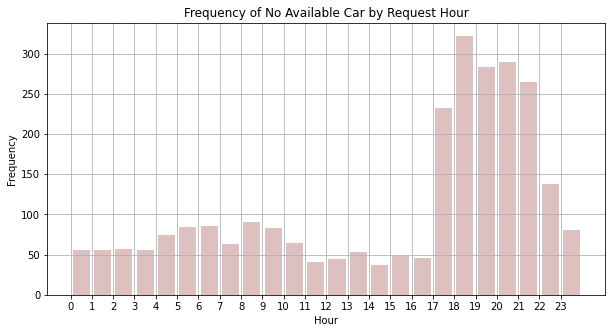

In [23]:
fig= plt.figure(figsize=(10,5))
plt.hist(No_car.Request_hour, bins=24, range =(0,24), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(0,24))
plt.title('Frequency of No Available Car by Request Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid()

By this above histogram we can see during 5 pm to 9 pm frequency of no available car is at the peak.And at 6 pm it reaches the most.

In [24]:
df.dtypes

Request id                     int64
Pickup point                  object
Driver id                    float64
Status                        object
Request timestamp     datetime64[ns]
Drop timestamp        datetime64[ns]
dom                            int64
weekday                        int64
Request_hour                   int64
Drop_hour                    float64
Trip_Duration        timedelta64[ns]
Month                          int64
dtype: object

In [25]:
Conf=df[df['Status']=='Trip Completed']
Conf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,dom,weekday,Request_hour,Drop_hour,Trip_Duration,Month
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,0,11,13.0,01:09:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,0,17,18.0,00:50:00,11
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,2,9,9.0,00:41:00,12
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,2,21,22.0,00:55:00,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,2,8,9.0,00:52:31,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,7,0,22,23.0,00:41:00,11
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,13,2,6,7.0,00:49:30,7
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,13,2,12,13.0,00:42:42,7
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,13,2,22,23.0,01:17:05,7


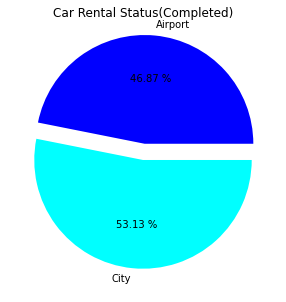

In [26]:
Airport = Conf.loc[Conf['Pickup point'] == 'Airport'].count()[0]
City = Conf.loc[Conf['Pickup point'] == 'City'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Airport', 'City']
colors = [(0,0,1), (0,1,1)]
explode = (.14,.01)
plt.pie([Airport,City],explode=explode, labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Car Rental Status(Completed)')

plt.show()

53% trips which are completed are Airport drop service.And rest 46% is Airport pick-up service.

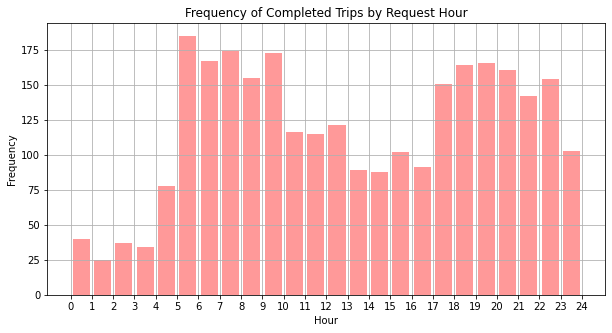

In [27]:
fig= plt.figure(figsize=(10,5))
plt.hist(Conf.Request_hour, bins=24, range =(0,24), rwidth=.8, color=(1,0,0), alpha=.4)
plt.xticks(range(0,25))
plt.title('Frequency of Completed Trips by Request Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid()

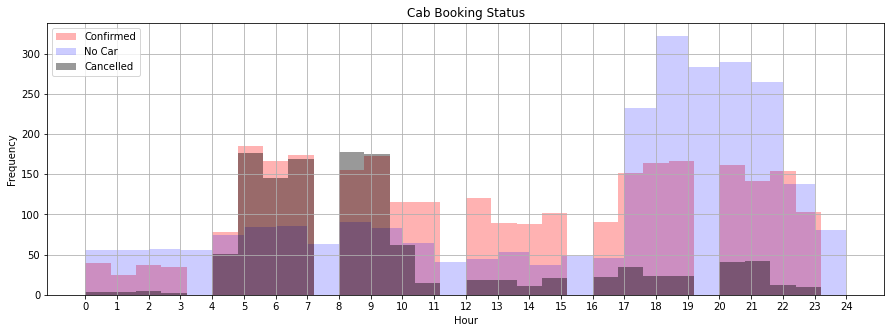

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5));
plt.hist('Request_hour', data =Conf,color = (1,0,0),bins=30, range =(0,24),alpha =0.3);
plt.grid()
plt.hist('Request_hour', data = No_car, color = (0,0,1),bins=24, range =(0,24),alpha = 0.2);
plt.grid()
plt.hist('Request_hour', data = Canc, color = (0,0,0),bins=30, range =(0,24),alpha = 0.4);
plt.title('Cab Booking Status')
plt.xticks(range(0,25))
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(["Confirmed","No Car","Cancelled"],loc='upper left')

plt.grid()

By splitting the dataset and analysing thoroughly it is concluded that Airport Drop services are mostly affected due to lack of available Cabs and cancelling the requested services.